<div id="instructions" style="border-radius: 5px; background-color:#f5f5f5;" >
<h1>MilestoneProject1</h1>
<p>Data Visualization of Jitter Head Count data set<p>
<p>Create different complementary views of data by applying multiple chart types and aesthetics.<p>
<p>Project multiple dimensions using conditioning or faceting (e.g. small multiples) on both categorical and numeric variables.<p>
</div>
## Author - Mayuri Joshi

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
import datetime
%matplotlib inline

In [2]:
# Cleaned up Dataset location
url = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/JitteredHeadCount.csv"
#Read Data using Pandas read_CVS function and store it into CasinoDataFrame
CasinoData = pd.read_csv(url,na_values=["?"])

In [3]:
#Find out the diemensions of Data
CasinoData.shape

(175677, 9)

In [4]:
#Find out the Datatypes of each Columns present in the dataFrame
CasinoData.dtypes

GameCode        object
DateFormat      object
Hour             int64
TablesOcc        int64
TablesOpen       int64
TablesClosed     int64
HeadCount        int64
DayOfWeek        int64
DayNumber        int64
dtype: object

In [5]:
#Find out first 10 records in data Frame
print(CasinoData.head(10))

  GameCode DateFormat  Hour  TablesOcc  TablesOpen  TablesClosed  HeadCount  \
0       BA  9/16/2011     6          0           0             1          0   
1       BA  9/16/2011     7          0           0             1          0   
2       BA  9/16/2011     8          0           0             1          0   
3       BA  9/16/2011     9          0           0             1          0   
4       BA  9/16/2011    10          0           1             0          0   
5       BA  9/16/2011    11          0           1             0          0   
6       BA  9/16/2011    12          0           1             0          0   
7       BA  9/16/2011    13          0           1             0          0   
8       BA  9/16/2011    14          0           1             0          0   
9       BA  9/16/2011    15          0           1             0          0   

   DayOfWeek  DayNumber  
0          6         47  
1          6         47  
2          6         47  
3          6         47  


In [6]:
#Find out the Statistical summary of each Numeric Column present in Data set
CasinoData.describe()

,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
count,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000
mean,11.504431,2.074591,2.555804,1.853430,7.390228,3.992953,183.434303
std,6.922330,3.307518,3.673229,2.993767,12.458613,1.997989,105.702167
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,6.000000,0.000000,1.000000,0.000000,0.000000,2.000000,92.000000
50%,12.000000,1.000000,1.000000,1.000000,3.000000,4.000000,183.000000
75%,18.000000,2.000000,3.000000,3.000000,8.000000,6.000000,275.000000
max,23.000000,24.000000,24.000000,23.000000,109.000000,7.000000,366.000000


Text(0.5,1,'Time series of GameCode')

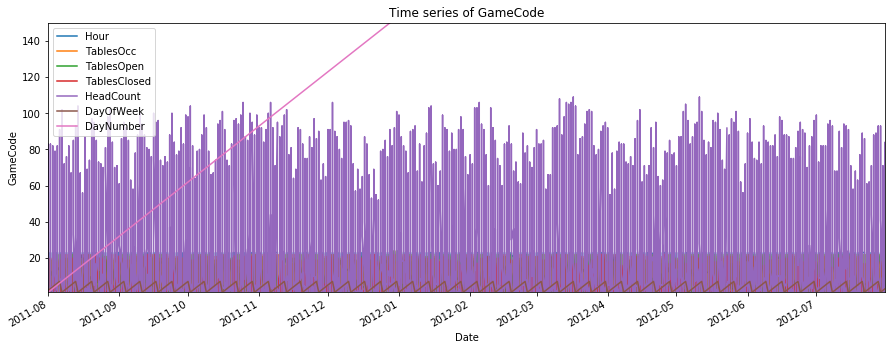

In [7]:
# Draw Line plot of GameCode to understand which game is played on which Date
#convert date to datetime format
%matplotlib inline
CasinoData.loc[:, 'DateFormat'] = pd.to_datetime(CasinoData.loc[:, 'DateFormat'])
CasinoData.set_index('DateFormat' ,inplace = True)
ax = plt.figure(figsize=(15, 5.5)).gca() # define axis
CasinoData.plot(ax = ax)
ax.set_xlabel('Date')
ax.set_ylim(1,150)
ax.set_ylabel('GameCode')
ax.set_title('Time series of GameCode')


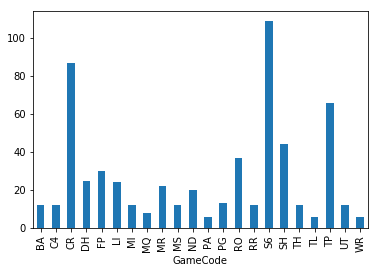

In [8]:
#Plot bar graph of GameCode of HeadCount to understand the distribution
CasinoData.groupby(['GameCode']).HeadCount.max().plot.bar()

#We Can observe here that S6 has the highest headcount.This is the most poplular game

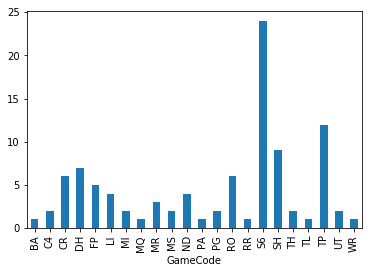

In [9]:
#Plot bar graph of GameCode of TablesOcc to understand the distribution
CasinoData.groupby(['GameCode']).TablesOcc.max().plot.bar()

Most Tables occupied for gameCode S6

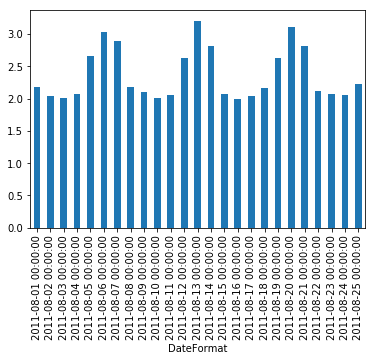

In [10]:
# group data by attribute
grouped = CasinoData.groupby('DateFormat').TablesOpen.mean().head(25).plot.bar()


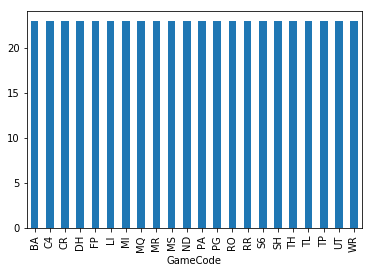

In [11]:
#Draw bar graph of Maximum hours played grouped by GameCode
CasinoData.groupby('GameCode').Hour.max().plot.bar()

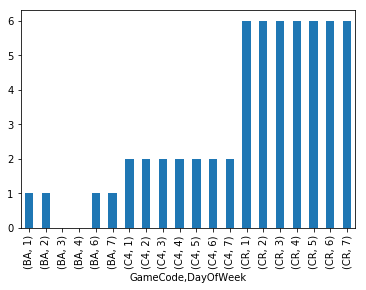

In [12]:
CasinoData.groupby(['GameCode','DayOfWeek']).TablesOcc.max().head(20).plot.bar()

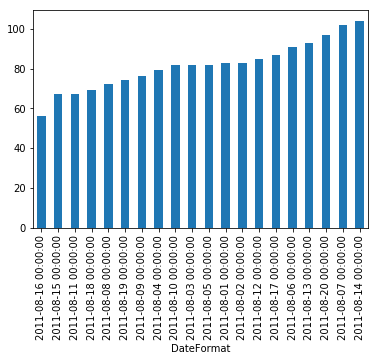

In [13]:
CasinoData.groupby(['DateFormat']).HeadCount.max().head(20).sort_values().plot.bar()

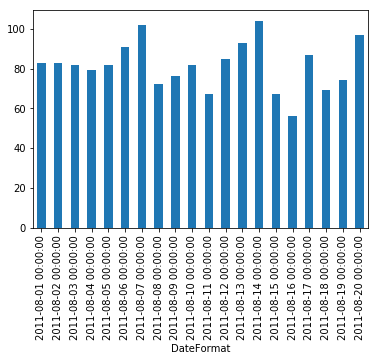

In [14]:
CasinoData.groupby(['DateFormat']).HeadCount.max().head(20).plot.bar()

C:\Users\mayur_000\Anaconda3\lib\site-packages\pandas\core\frame.py:5847: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  return_type=return_type, **kwds)
C:\Users\mayur_000\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


(0.0, 50000.0)

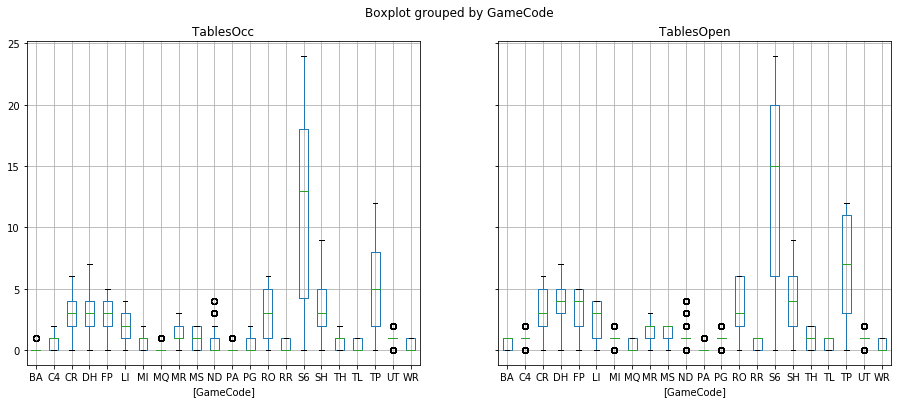

In [15]:
# Draw Boxplot of TablesOccupied and Tables open grouped by GameCode
fig = plt.figure(figsize=(15, 6)) # define plot area
ax = fig.gca() # define axis 
CasinoData.loc[:,['GameCode', 'TablesOcc','TablesOpen']].boxplot(by = ['GameCode'], ax = ax)
ax.set_title('Box plot of GameCode and TablesOpen and TablesOcc') # Give the plot a main title
ax.set_ylabel('Auto Price')# Set text for y axis
ax.set_ylim(0.0, 50000.0) # Set the limits of the y axis

In [16]:
# Here We can clearly see that S6 gamecode has the most greater range of Tables Occupied and Tables Open Values

C:\Users\mayur_000\Anaconda3\lib\site-packages\pandas\core\frame.py:5847: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  return_type=return_type, **kwds)
C:\Users\mayur_000\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


(0.0, 50000.0)

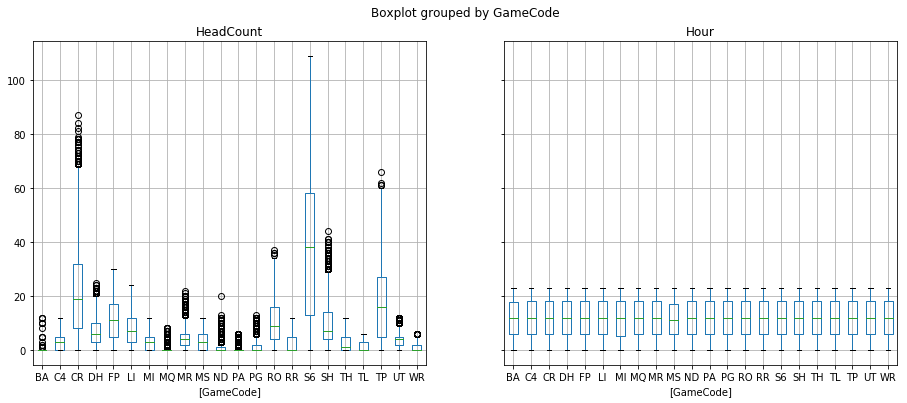

In [17]:
# Draw Boxplot of TablesOccupied and Tables open grouped by GameCode
fig = plt.figure(figsize=(15, 6)) # define plot area
ax = fig.gca() # define axis 
CasinoData.loc[:,['GameCode', 'HeadCount','Hour']].boxplot(by = ['GameCode'], ax = ax)
ax.set_title('Box plot of GameCode and HeadCount and Hour') # Give the plot a main title
ax.set_ylabel('Auto Price')# Set text for y axis
ax.set_ylim(0.0, 50000.0) # Set the limits of the y axis

In [18]:
#We can see from above graph that gameCode CR has the Most HeadCount and Most outliers and S6 has greater range of HeadCounts
#Number of Hours of each Game code has same range of values

Text(0.5,0,'HeadCount')

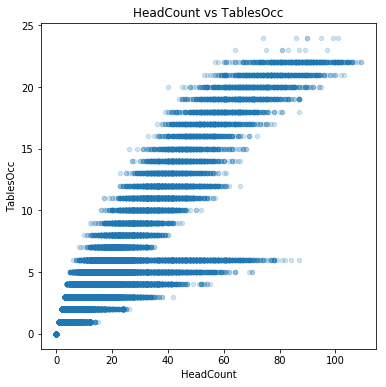

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
ax = plt.figure(figsize=(6, 6)).gca() # define axis
CasinoData.plot.scatter(x = 'HeadCount', y = 'TablesOcc', ax = ax, alpha = 0.2)
ax.set_title('HeadCount vs TablesOcc') # Give the plot a main title
ax.set_ylabel('TablesOcc')# Set text for y axis
ax.set_xlabel('HeadCount')

In [20]:
#There is almost linear relationship between TablesOcc and HeadCount

Text(0.5,0,'Hour')

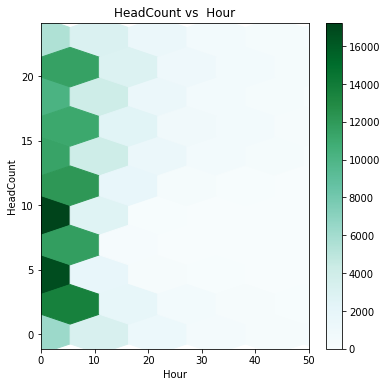

In [21]:
ax = plt.figure(figsize=(6, 6)).gca() # define axis
CasinoData.plot.hexbin(x = 'HeadCount', y = 'Hour', gridsize = 10, ax = ax)
ax.set_xlim(0,50)
ax.set_title('HeadCount vs  Hour') # Give the plot a main title
ax.set_ylabel('HeadCount')# Set text for y axis
ax.set_xlabel('Hour')


In [22]:
import pandas as pd
#for each gamecode, sum the total number of HeadCount in each bin 
game_headCount = pd.crosstab(CasinoData.loc[:, 'HeadCount'], CasinoData.loc[:, 'GameCode'])
print(game_headCount.head())

GameCode    BA    C4   CR   DH   FP    LI    MI    MQ    MR  MS  ...     PG  \
HeadCount                                                        ...          
0          100  2314  207  296  303  1057  2885  7743  1287  49  ...   4577   
1            5   641  226  537  288   515   543   467   795  10  ...   1554   
2            2   849  233  707  413   561   725   277   959  13  ...   1096   
3            1   938  261  805  399   407   806   126   953   7  ...    548   
4            0  1081  237  847  365   407   898    51   854   8  ...    293   

GameCode    RO    RR   S6   SH    TH    TL   TP    UT    WR  
HeadCount                                                    
0          470  4595  648  311  4028  4394  445   888  6012  
1          377   272   92  418   379   896  339   712   501  
2          523   485  148  589   534  1152  445  1006   669  
3          547   499  124  597   582   863  324  1075   550  
4          487   510  159  624   575   558  251  1195   405  

[5 rows x 2

In [23]:
#determine number of HeadCount for each model
game_code = game_headCount.apply(sum, axis = 0)
print(game_code)
#print(game_code.head())
print(sum(game_code)) # sanity check 

GameCode
BA     118
C4    8778
CR    8778
DH    8778
FP    8778
LI    8778
MI    8630
MQ    8778
MR    8778
MS     147
ND    8778
PA    8778
PG    8778
RO    8778
RR    8778
S6    8778
SH    8778
TH    8778
TL    8778
TP    8778
UT    8778
WR    8778
dtype: int64
175677


In [24]:
print(min(game_code)) # sanity check 
# Minimum number 118 people have played the game BA 118

118


In [25]:
# Maximum number 8778 people have played all rest of the game
print(max(game_code)) # sanity check 

8778


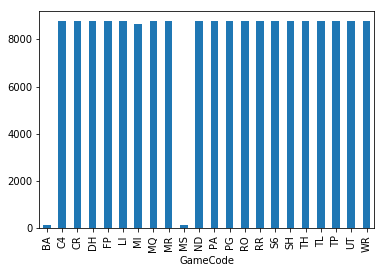

In [26]:
game_code.plot(kind='bar')

In [27]:
#divide each column in the matrix by the number of cars of that make
game_HeadCount = game_headCount.div(game_code, axis = 1)
print(game_HeadCount.head())
print(game_HeadCount.apply(sum, axis=0)) # sanity check

GameCode         BA        C4        CR        DH        FP        LI  \
HeadCount                                                               
0          0.847458  0.263614  0.023582  0.033721  0.034518  0.120415   
1          0.042373  0.073023  0.025746  0.061176  0.032809  0.058669   
2          0.016949  0.096719  0.026544  0.080542  0.047049  0.063910   
3          0.008475  0.106858  0.029733  0.091707  0.045455  0.046366   
4          0.000000  0.123149  0.026999  0.096491  0.041581  0.046366   

GameCode         MI        MQ        MR        MS    ...           PG  \
HeadCount                                            ...                
0          0.334299  0.882092  0.146617  0.333333    ...     0.521417   
1          0.062920  0.053201  0.090567  0.068027    ...     0.177033   
2          0.084009  0.031556  0.109250  0.088435    ...     0.124858   
3          0.093395  0.014354  0.108567  0.047619    ...     0.062429   
4          0.104056  0.005810  0.097289  0.054422 

Text(0.5,1,'Hours played of each Game Code ')

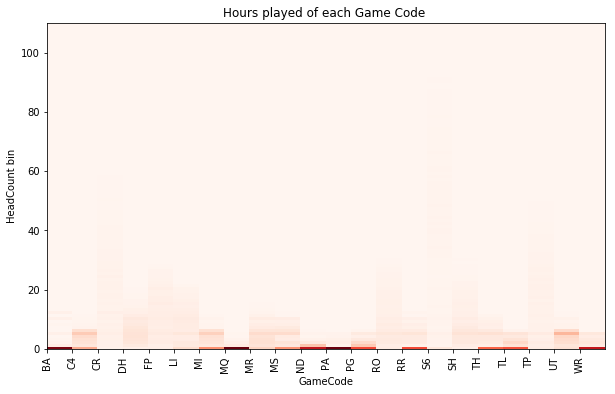

In [28]:
ax = plt.figure(figsize=(10, 6)).gca() # define axis
ax.pcolor(game_HeadCount, cmap = 'Reds')
ax.set_xticks(range(game_HeadCount.shape[1]))
ax.set_xticklabels(game_HeadCount.columns, rotation=90)
ax.set_xlabel('GameCode')
ax.set_ylabel('HeadCount bin')
ax.set_title('Hours played of each Game Code ')

We can clearly see that most of the Head count is at Game BA and MQ and MR,WR

In [29]:
#Get the subset of dataframe for Weekends
WeekendCasinoData = CasinoData[CasinoData.DayOfWeek.isin([5,6,7])] 
WeekendCasinoData.head(5)

,GameCode,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
DateFormat,,,,,,,,
2011-09-16,BA,6,0,0,1,0,6,47
2011-09-16,BA,7,0,0,1,0,6,47
2011-09-16,BA,8,0,0,1,0,6,47
2011-09-16,BA,9,0,0,1,0,6,47
2011-09-16,BA,10,0,1,0,0,6,47


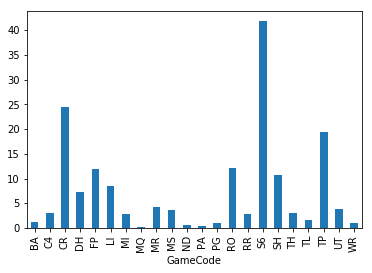

In [30]:
#Plot Barchart of HeadCount of GameCodewise in WeekendCasinoData
WeekendCasinoData.groupby('GameCode').HeadCount.mean().plot.bar()


In [31]:
#We can see on Weekend also S6 is the most popular game and second popular game is CR

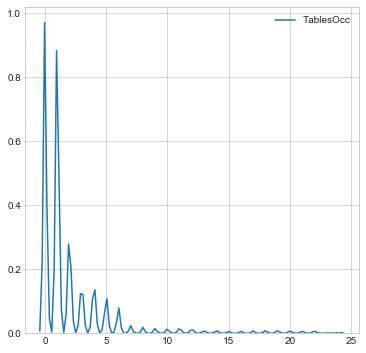

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

#Plot 1
ax1 = fig.gca() # define axis 
fig = plt.figure(figsize=(6,6)) # define plot area
sns.set_style("whitegrid")
sns.kdeplot(CasinoData.TablesOcc)


In [33]:
# We can observe hat in Casino most of the tables Occupied are 0 to 5

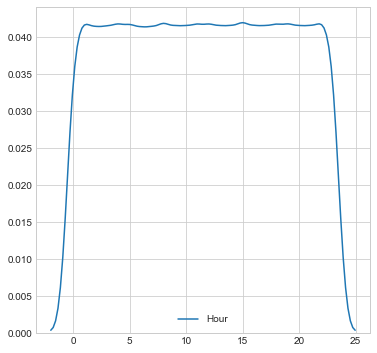

In [34]:
%matplotlib inline
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() # define axis 
sns.kdeplot(CasinoData.Hour)


In [35]:
# We can see Hour has uniform distribution

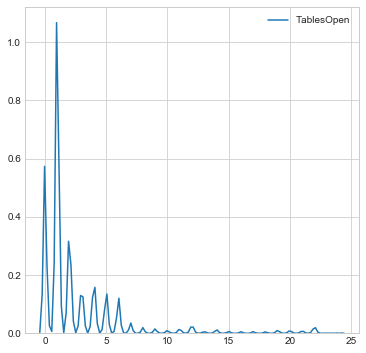

In [36]:
#Plot 3
fig = plt.figure(figsize=(6,6)) # define plot area
ax3 = fig.gca() # define axis 
#sns.set_style("whitegrid")
sns.kdeplot(CasinoData.TablesOpen)



In [37]:
# we can observe that most of TablesOpen are within 0 to 5 

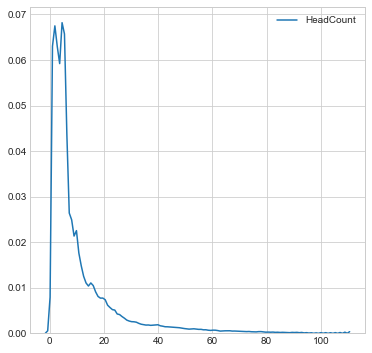

In [38]:
#Plot 5
ax5 = fig.add_subplot(3,2,5)
fig = plt.figure(figsize=(6,6)) # define plot area
ax5 = fig.gca() # define axis 
#sns.set_style("whitegrid")
sns.kdeplot(CasinoData.HeadCount)


In [39]:
# We can observe that in Casino most of the time 0 to 20 people are present
#Very few times 20 to 40 people present

Text(0.5,0,'DayOfWeek')

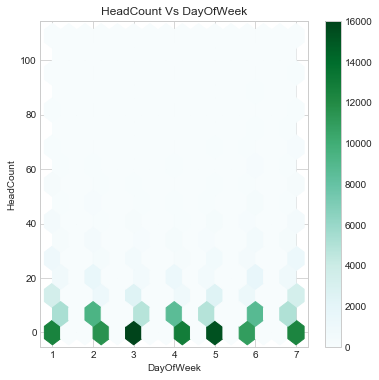

In [40]:
%matplotlib inline
ax = plt.figure(figsize=(6, 6)).gca() # define axis
CasinoData.plot.hexbin(x = 'DayOfWeek', y = 'HeadCount', gridsize = 15, ax = ax)
ax.set_title('HeadCount Vs DayOfWeek') # Give the plot a main title
ax.set_ylabel('HeadCount')# Set text for y axis
ax.set_xlabel('DayOfWeek')

#We can clearly see that headcount is more on Friday and Wednesday. Its less on Monday and Sunday

Text(0.5,0,'DayOfWeek')

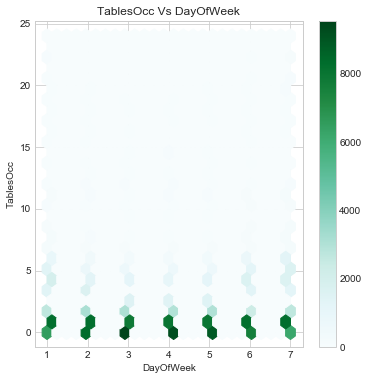

In [41]:
%matplotlib inline
ax = plt.figure(figsize=(6, 6)).gca() # define axis
CasinoData.plot.hexbin(x = 'DayOfWeek', y = 'TablesOcc', gridsize = 25, ax = ax)
ax.set_title('TablesOcc Vs DayOfWeek') # Give the plot a main title
ax.set_ylabel('TablesOcc')# Set text for y axis
ax.set_xlabel('DayOfWeek')

In [42]:
# We can clearly see that Tables are occupied on Wednesday, Thursday and Friday

Text(0.5,0,'HeadCount')

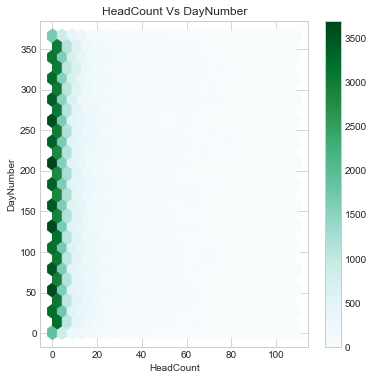

In [43]:
%matplotlib inline
ax = plt.figure(figsize=(6, 6)).gca() # define axis
CasinoData.plot.hexbin(x = 'HeadCount', y = 'DayNumber', gridsize = 25, ax = ax)
ax.set_title('HeadCount Vs DayNumber') # Give the plot a main title
ax.set_ylabel('DayNumber')# Set text for y axis
ax.set_xlabel('HeadCount')

In [44]:
#From above Graph we can see that headcount is higher around 200 to 275. These daya are in Month of August, during Summer 
#season most of people come to play Casino

Text(0.5,1,'Headcount vs. Hour \n with GameCode by color')

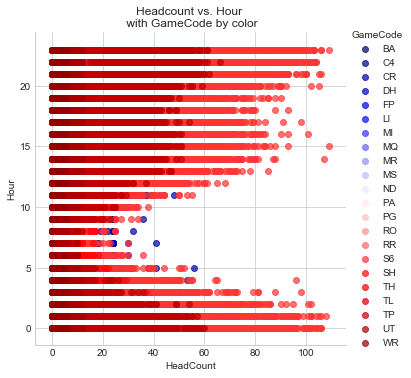

In [45]:
sns.lmplot(x = 'HeadCount', y = 'Hour', 
           data = CasinoData, 
           hue = "GameCode", 
           palette="seismic", 
           scatter_kws={'alpha':0.7},
           fit_reg = False)
plt.xlabel('HeadCount')
plt.ylabel('Hour')
plt.title('Headcount vs. Hour \n with GameCode by color')

In [46]:
#We can clearly observe that most of the HeadCount and Hours played by each GameCode

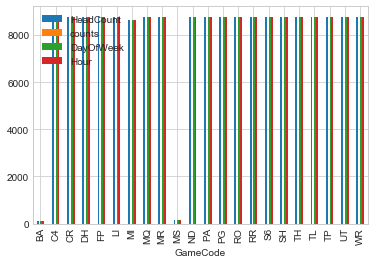

In [47]:
%matplotlib inline
CasinoData.loc[:, ['HeadCount', 'GameCode','counts','DayOfWeek','Hour']].groupby(['GameCode']).agg('count').plot.bar()

Text(0.5,1,'Hour vs. HeadCount \n with GameCode by color \n with TablesOcc as marker size')

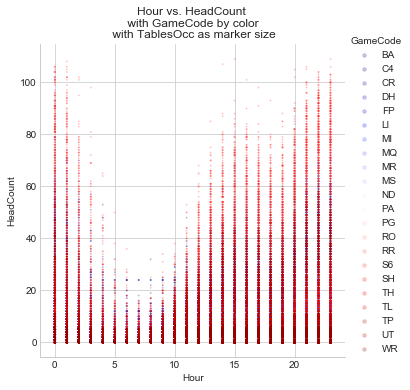

In [48]:
sns.lmplot(x = 'Hour', y = 'HeadCount', 
           data = CasinoData, 
           hue = "GameCode", 
           palette="seismic", 
            scatter_kws={'alpha':0.2, 
                        's': CasinoData.loc[:, 'TablesOcc']},
           fit_reg = False)
plt.xlabel('Hour')
plt.ylabel('HeadCount')
plt.title('Hour vs. HeadCount \n with GameCode by color \n with TablesOcc as marker size')

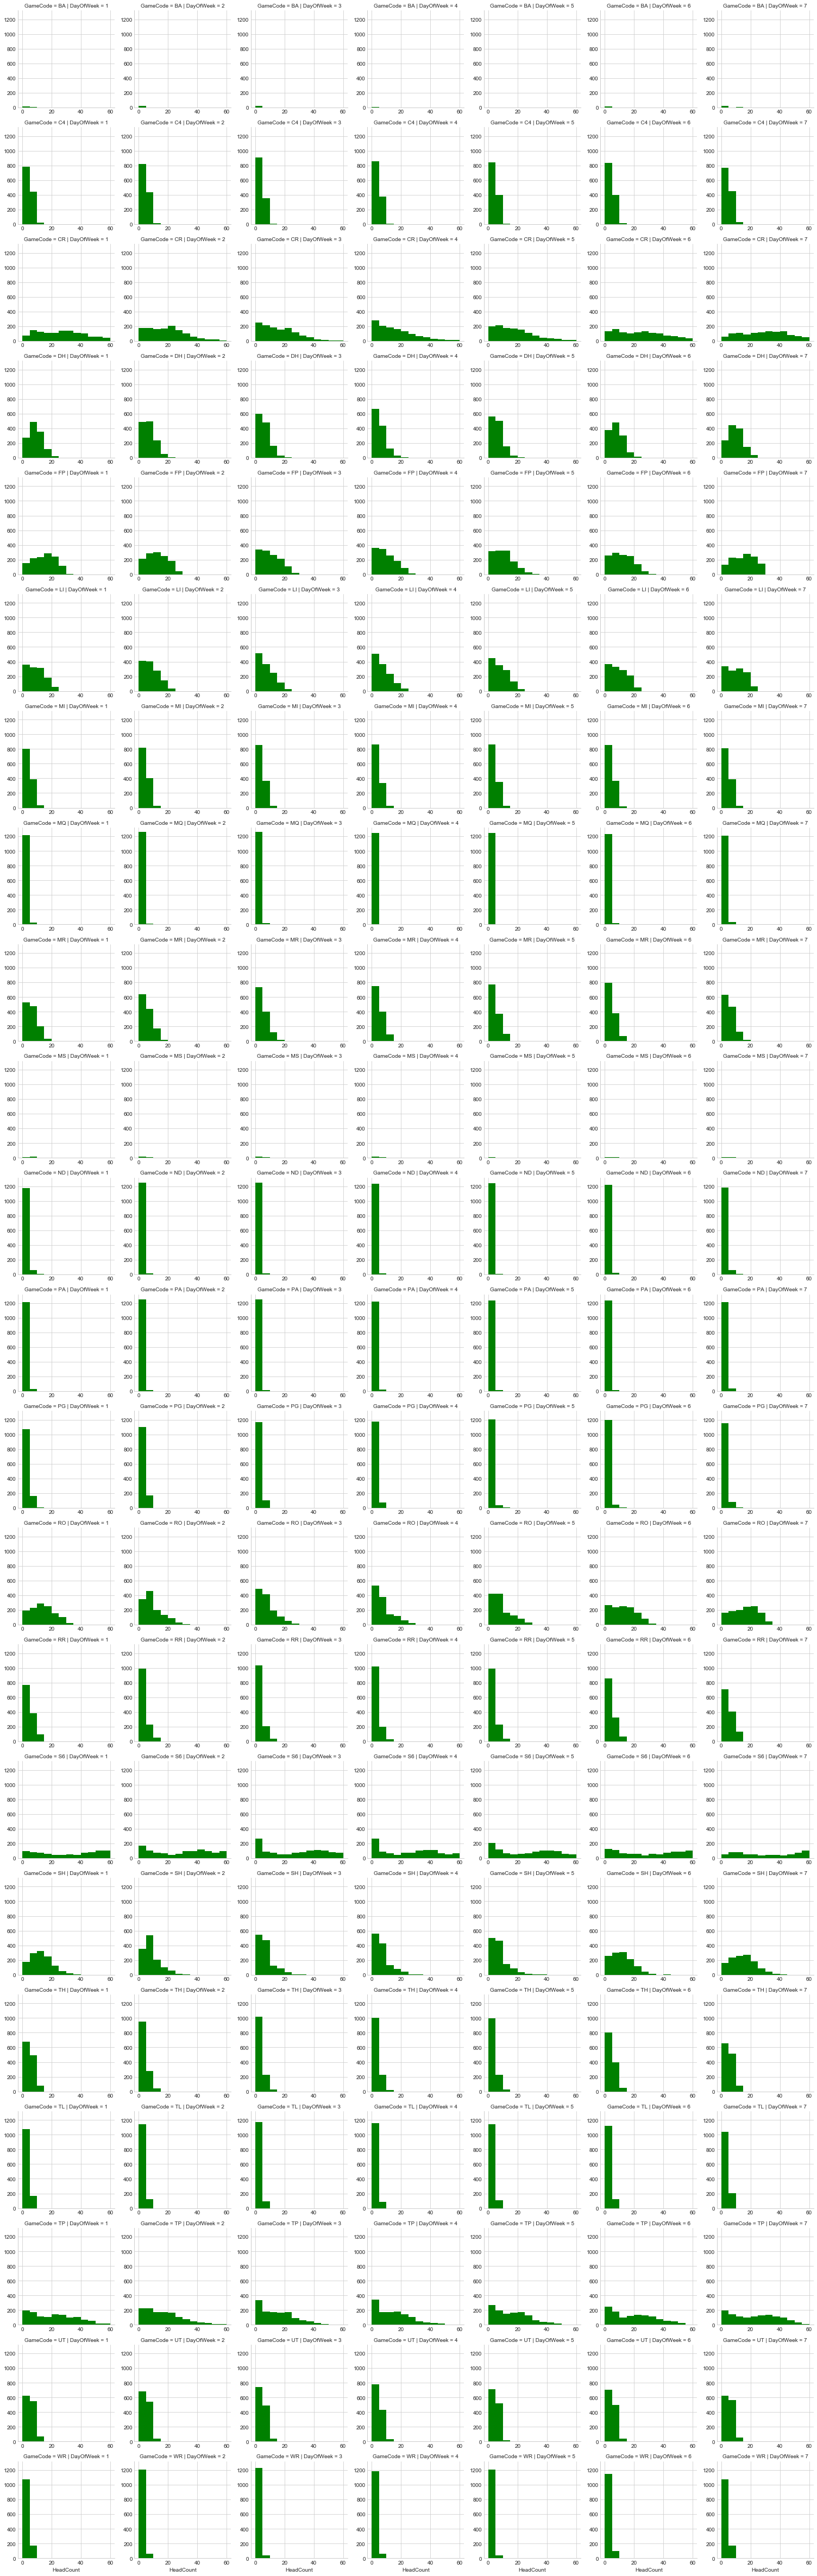

In [49]:
bins = np.arange(0, 65, 5)
g = sns.FacetGrid(CasinoData, col="DayOfWeek",  row="GameCode")
g = g.map(plt.hist, "HeadCount",bins=bins, color="g")

In [50]:
##Here we can observe the Headcount for each GameCode on each day of week

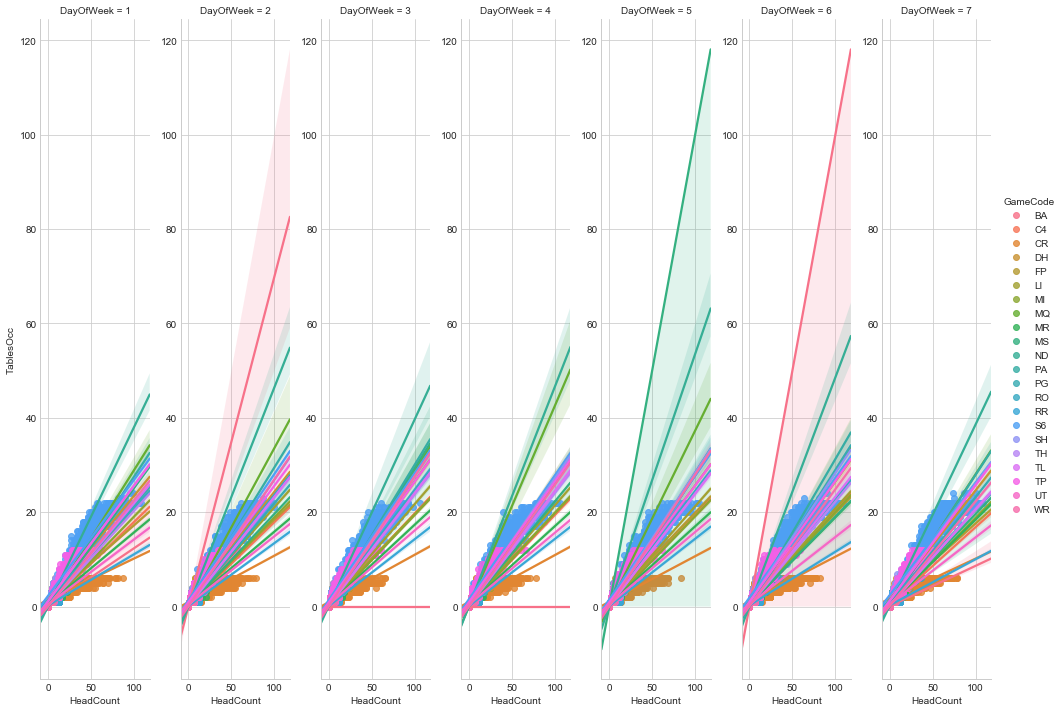

In [51]:
fig = plt.figure(figsize=(15,15))
sns.lmplot(x="HeadCount", y="TablesOcc", hue="GameCode", col="DayOfWeek", data=CasinoData,size=10,aspect=0.2);

In [52]:
# We can observe from above graph that MR and WR are the most popular games played 
#by people on Friday and Saturday respectively

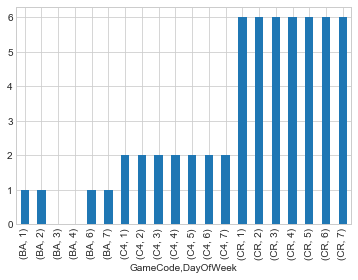

In [53]:
#First the average number of occupied tables per day is calculated for each game as shown in Figure 1 below. Game S6 is found out to have the most occupied tables.
#CasinoData.groupby(['DateFormat','GameCode']).HeadCount.max()
CasinoData.groupby(['GameCode','DayOfWeek']).TablesOcc.max().head(20).plot.bar()
#plt.bar(CasinoData.GameCode,CasinoData.groupby('DateFormat').TablesOcc.max())

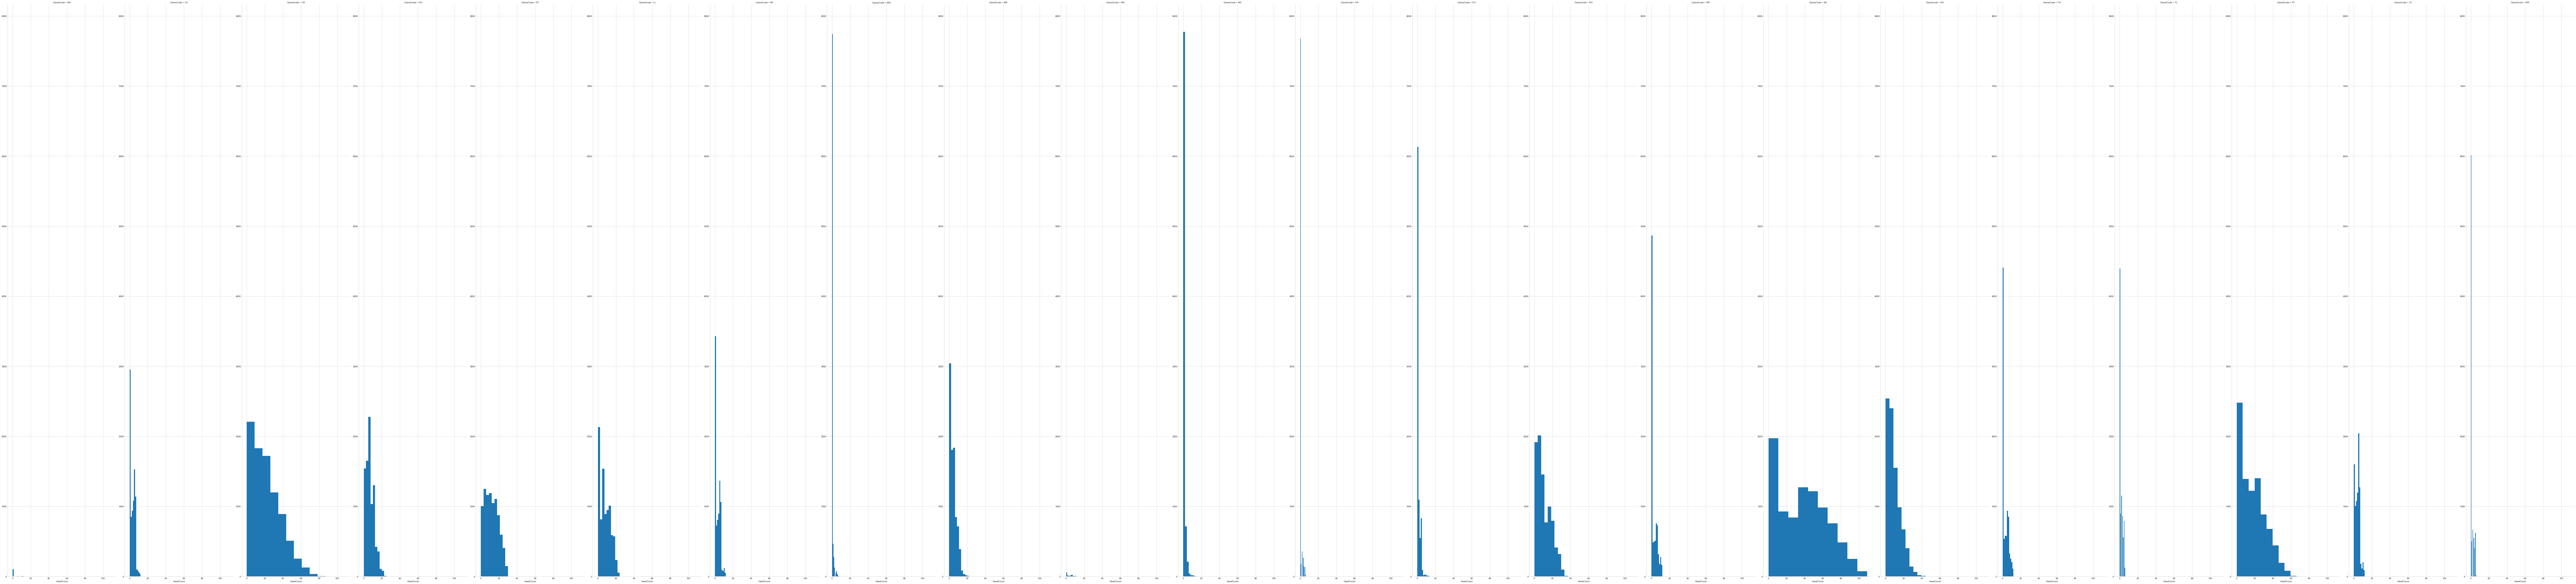

In [54]:
gr = sns.FacetGrid(CasinoData, col="GameCode",size=35,aspect=0.2)
gr = gr.map(plt.hist, "HeadCount")

## Summary

- We have Applied basic bi-variate chart types to examine the relationships between pairs of variables. We used scatter plots with low alpha (transparency) values, as well as KDE and hexbin plots to overcome overplotting. 
- Used multi-axis and faceted plots to project additional dimensions onto the two dimensional plot surface. The scatter plot matrix allows you to display relationships between multiple variables on a single set of axes. In faceted plotting subsets of values (grouped values) at displayed on an array of axes. 
- We have used Asthetics specially color to display graph of 4 variables Gamecode,Headcount,DayOfWeek and Tables Occupied 

## Following are Observations
- We Can observe here that S6 has the highest headcount.This is the most poplular game
- Most Tables occupied for gameCode S6
- Here We can clearly see that S6 gamecode has the most greater range of Tables Occupied and Tables Open Values
- We can see from above graph that gameCode CR has the Most HeadCount and Most outliers and S6 has greater range of HeadCounts
- Number of Hours of each Game code has same range of values
- There is almost linear relationship between TablesOcc and HeadCount
- Most people prefer Game BA and MQ and MR
- On Weekend also S6 is the most popular game and second popular game is CR
- Most of time 0 to 5 TablesOpen  
- We can observe that in Casino most of the time 0 to 20 people are present
  Very few times 20 to 40 people present
- We can clearly see that headcount is more on Friday and Wednesday. Its less on Monday and Sunday
- We can clearly see that Tables are occupied on Wednesday, Thursday and Friday
- From above Graph we can see that Headcount is higher around 200 to 275. These days are in Month of August, during Summer 
    season most of people come to play Casino
- We can observe from above graph that MR and WR are the most popular games played by people on Friday and Saturday
